In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging 

Importing dataset¶
- Since data is in form of excel file we have to use pandas read_excel to load the data.
- Check whether any null values are there or not. if it is present then following can be done,
- Imputing data using Imputation method in sklearn
- Filling NaN values with mean, median and mode using fillna() method
- or any other imputaion method

In [107]:
df = pd.read_excel(r"D:\flight price prediction project\flight-price-prediction-project\notebook\data\Data_Train.xlsx")

In [108]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [109]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [110]:
df.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [111]:
df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [112]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [113]:
logging.debug(df)

In [114]:
pd.set_option('display.max_columns', None)

In [115]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [116]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [117]:
df.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [118]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [119]:
df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [120]:
df1 = df.dropna()

In [121]:
logging.debug(df1)

In [122]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [123]:
logging.debug(df1.isnull().sum())

In [124]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [125]:
logging.debug(df1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


### EDA

In [126]:
df1. Airline

0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10682, dtype: object

In [127]:
df1. Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [128]:
df1['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

In [129]:
df1['Journey_day']=pd.to_datetime(df1['Date_of_Journey'],format="%d/%m/%Y").dt.day

C:\Users\acer\AppData\Local\Temp\ipykernel_24292\4186624805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Journey_day']=pd.to_datetime(df1['Date_of_Journey'],format="%d/%m/%Y").dt.day


In [130]:
logging.debug(df1['Journey_day'])

In [131]:
df1['Journey_month']=pd.to_datetime(df1['Date_of_Journey'],format="%d/%m/%Y").dt.month

C:\Users\acer\AppData\Local\Temp\ipykernel_24292\4227912108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Journey_month']=pd.to_datetime(df1['Date_of_Journey'],format="%d/%m/%Y").dt.month


In [132]:
logging.debug(df1['Journey_month'])

In [133]:
df1['Journey_year']=pd.to_datetime(df1['Date_of_Journey'],format="%d/%m/%Y").dt.year

C:\Users\acer\AppData\Local\Temp\ipykernel_24292\2895806983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Journey_year']=pd.to_datetime(df1['Date_of_Journey'],format="%d/%m/%Y").dt.year


In [134]:
logging.debug(df1['Journey_year'])

In [135]:
df1= df1.drop(['Date_of_Journey'], axis=1)

In [136]:
df1

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [137]:
logging.debug(df1)

In [138]:
df1.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [139]:
df1.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [140]:
df1.Dep_Time.unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [141]:
df1['hours']=pd.to_datetime(df1['Dep_Time']).dt.hour

C:\Users\acer\AppData\Local\Temp\ipykernel_24292\3406187574.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['hours']=pd.to_datetime(df1['Dep_Time']).dt.hour


In [142]:
logging.debug(df1['hours'])

In [143]:

df1['minutes']=pd.to_datetime(df1['Dep_Time']).dt.minute

C:\Users\acer\AppData\Local\Temp\ipykernel_24292\3780473484.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['minutes']=pd.to_datetime(df1['Dep_Time']).dt.minute


In [144]:
logging.debug(df1['minutes'])

In [145]:
logging.debug(df1)

In [146]:
df1.drop(["Dep_Time"], axis = 1, inplace = True)

In [147]:
df1["Arrival_hour"] = pd.to_datetime(df1.Arrival_Time).dt.hour

C:\Users\acer\AppData\Local\Temp\ipykernel_24292\562023524.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1["Arrival_hour"] = pd.to_datetime(df1.Arrival_Time).dt.hour


In [148]:
logging.debug(df1["Arrival_hour"])

In [149]:
df1.Arrival_Time.unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [150]:
df1["Arrival_min"] = pd.to_datetime(df1.Arrival_Time).dt.minute

C:\Users\acer\AppData\Local\Temp\ipykernel_24292\858325363.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1["Arrival_min"] = pd.to_datetime(df1.Arrival_Time).dt.minute


In [151]:
logging.debug(df1["Arrival_min"])

In [152]:
df1.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,hours,minutes,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


- Time taken by plane to reach destination is called Duration
- It is the differnce between Departure Time and Arrival time

In [153]:
df1.Duration

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [154]:
duration = list(df1["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [155]:
df1.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,hours,minutes,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [156]:
df1["duration-mins"]= duration_mins

In [157]:
df1["duration-mins"].unique()

array([50, 25,  0, 45, 30,  5, 15, 35, 10, 20, 55, 40], dtype=int64)

In [158]:
df1["duration-hours"]= duration_hours

In [159]:
df1.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,hours,minutes,Arrival_hour,Arrival_min,duration-mins,duration-hours
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,50,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,25,7


In [160]:
df1 = df1.drop(["Duration"],axis=1)

In [161]:
df1 = df1.drop(["Arrival_Time"],axis=1)

In [162]:
df1.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [163]:
df1['duration-mins'].unique()

array([50, 25,  0, 45, 30,  5, 15, 35, 10, 20, 55, 40], dtype=int64)

In [164]:
df1['duration-hours'].unique()

array([ 2,  7, 19,  5,  4, 15, 21, 25, 13, 12, 26, 22, 23, 20, 10,  6, 11,
        8, 16,  3, 27,  1, 14,  9, 18, 17, 24, 30, 28, 29, 37, 34, 38, 35,
       36, 47, 33, 32, 31, 42, 39,  0, 41, 40], dtype=int64)

In [165]:
for i in range(len(df1['duration-mins'])):
    a=  duration[i].split(sep = "h")[0]
    b= a.split()[-1]
    duration_mins.append(b)

In [166]:
df1['duration-mins'].unique()

array([50, 25,  0, 45, 30,  5, 15, 35, 10, 20, 55, 40], dtype=int64)

### Airlines Company vs Flight Ticket Price

C:\Users\acer\AppData\Local\Temp\ipykernel_24292\912351843.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Airline',y='Price',data=df1, palette='rainbow')


Text(0.5, 1.0, 'airline vs price')

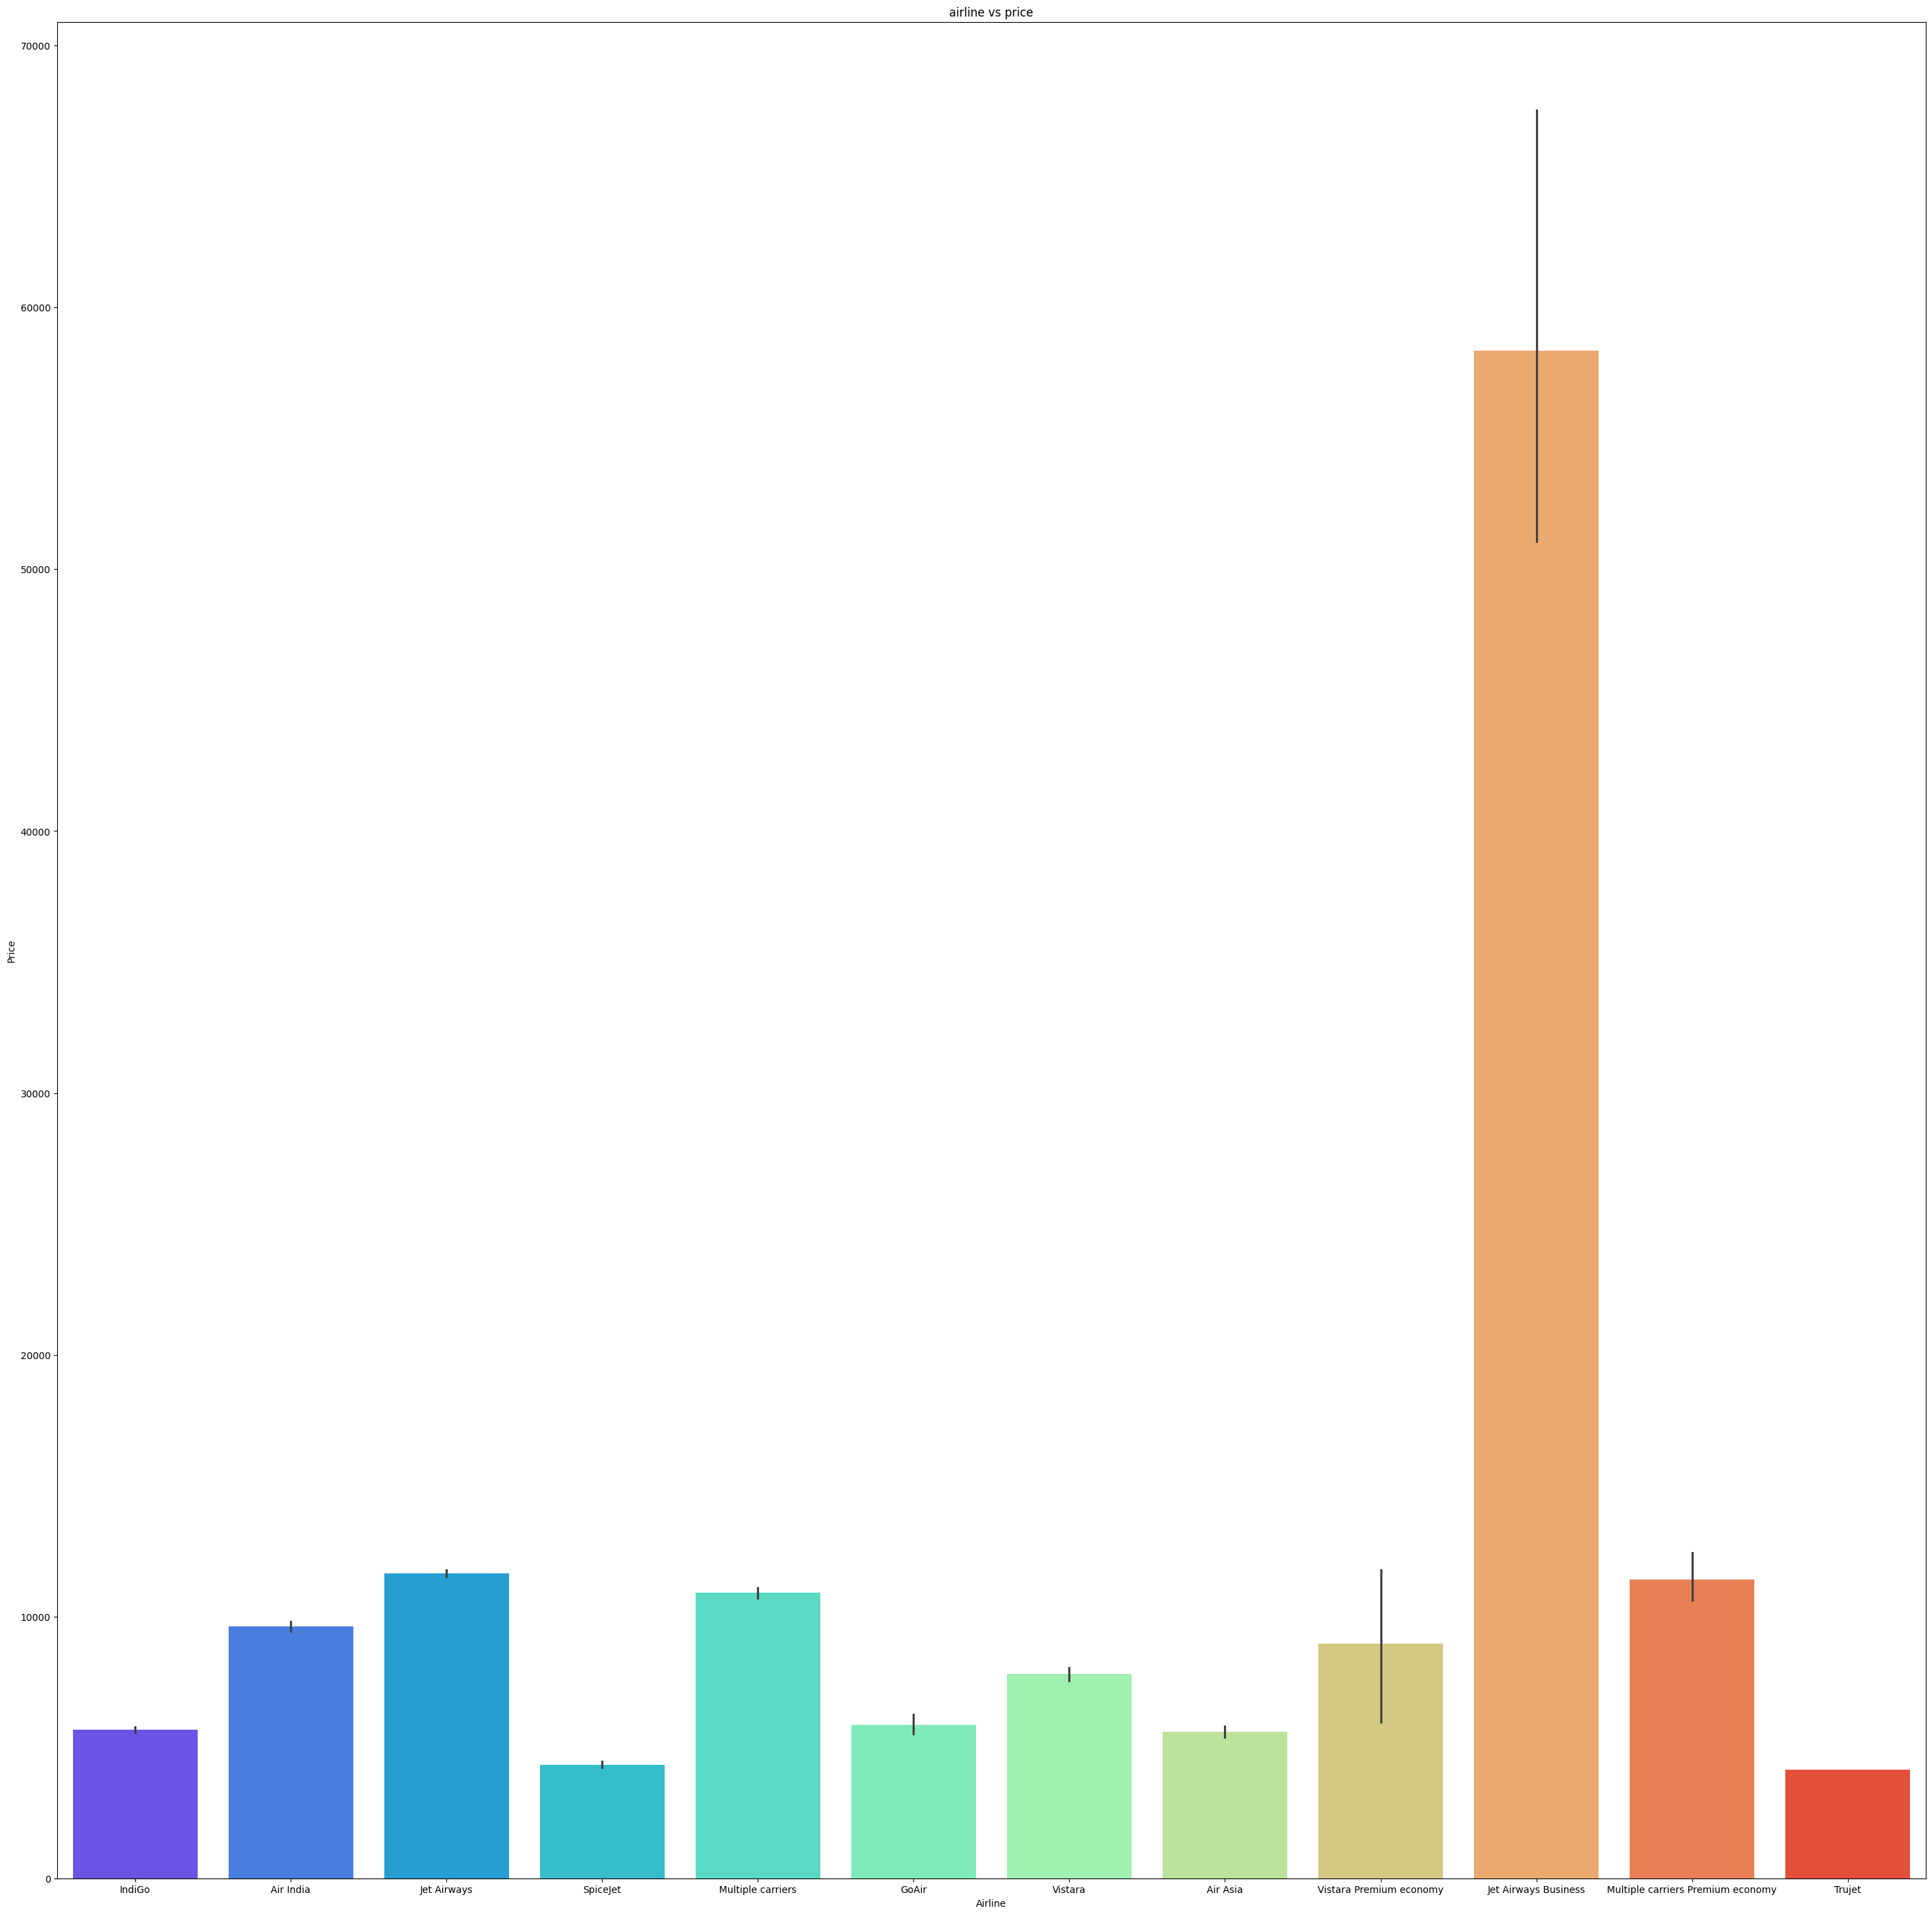

In [167]:
plt.figure(figsize=(35,35))
sns.barplot(x='Airline',y='Price',data=df1, palette='rainbow')
plt.title("airline vs price")

- As we can see jet airways has the highest price

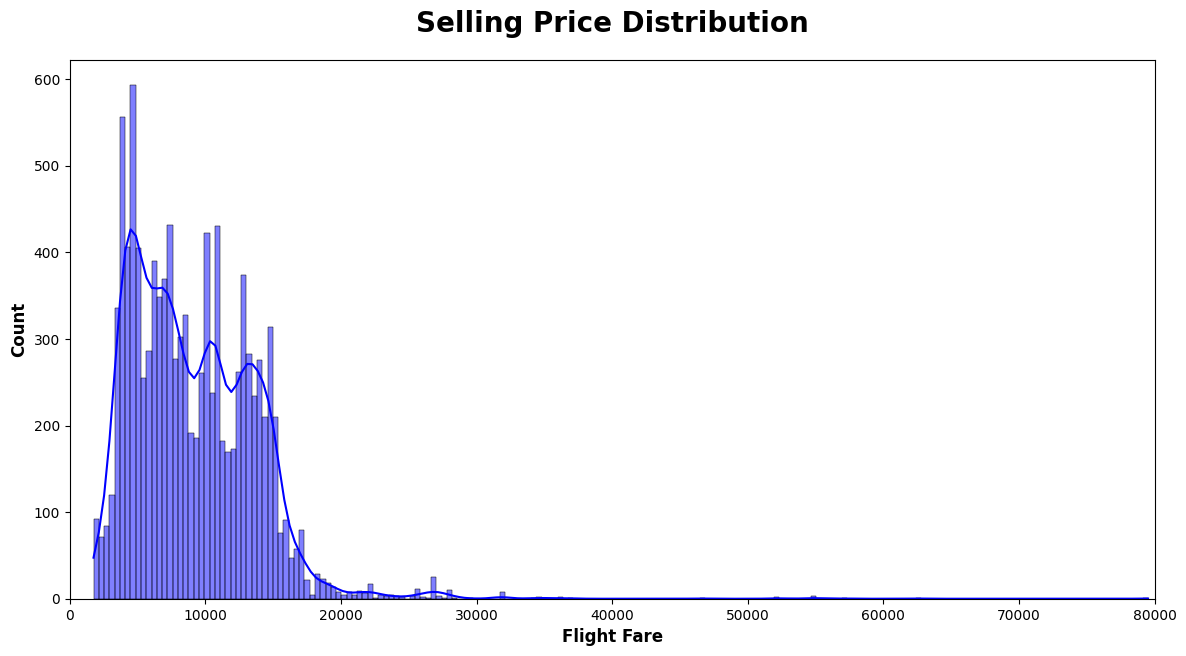

In [168]:
plt.subplots(figsize=(14,7))
sns.histplot(df.Price, bins=200, kde=True, color = 'b')
plt.title("Selling Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Flight Fare", weight="bold", fontsize=12)
plt.xlim(0,80000)
plt.show()

- From the chart it is clear that the Target Variable is Skewed

### Top 10 Aviation Companies whose flight tickets are sold the most

In [169]:
df.Airline.value_counts()[0:10]

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Name: count, dtype: int64

C:\Users\acer\AppData\Local\Temp\ipykernel_24292\3275302900.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Airline", data=df,ec = "black",palette="Set1",order = df['Airline'].value_counts().index)


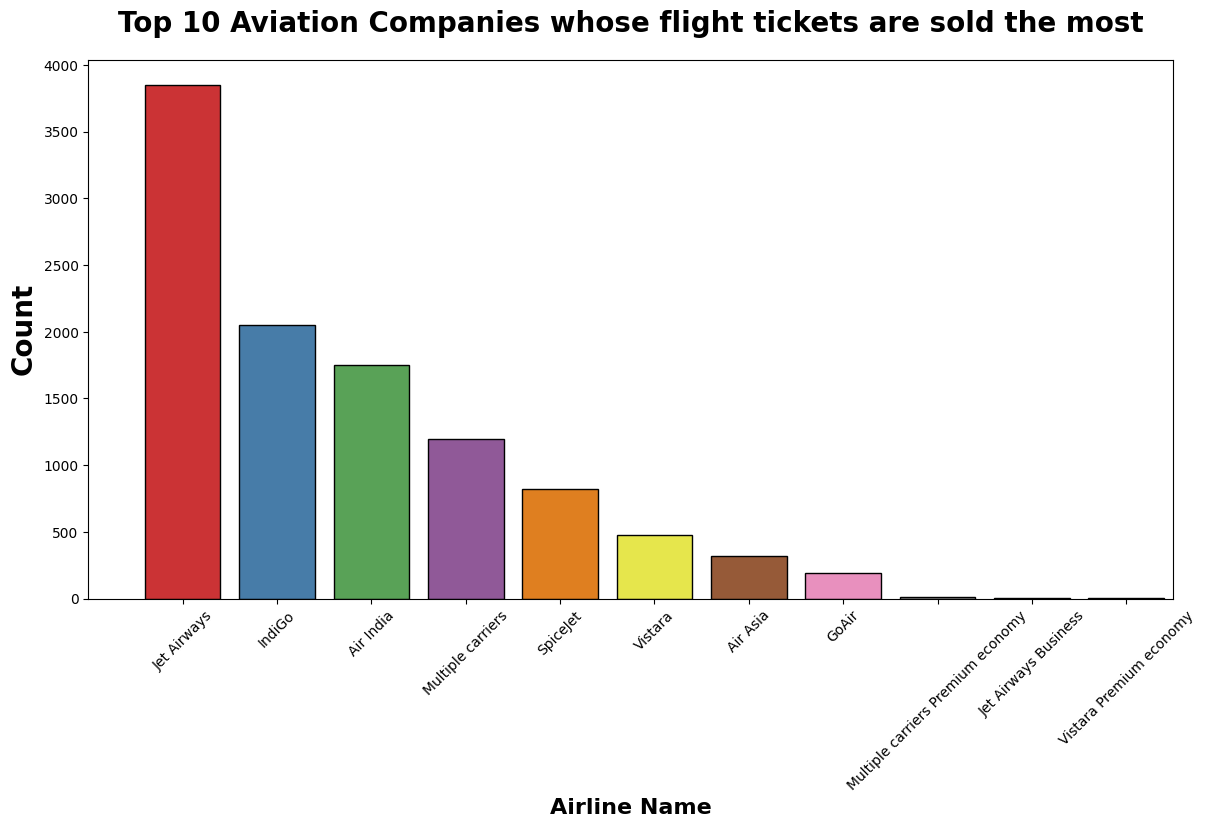

In [170]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Airline", data=df,ec = "black",palette="Set1",order = df['Airline'].value_counts().index)
plt.title("Top 10 Aviation Companies whose flight tickets are sold the most", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Airline Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

### Destination vs price

C:\Users\acer\AppData\Local\Temp\ipykernel_24292\1776107883.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Destination',y='Price',data=df1, palette='rainbow')


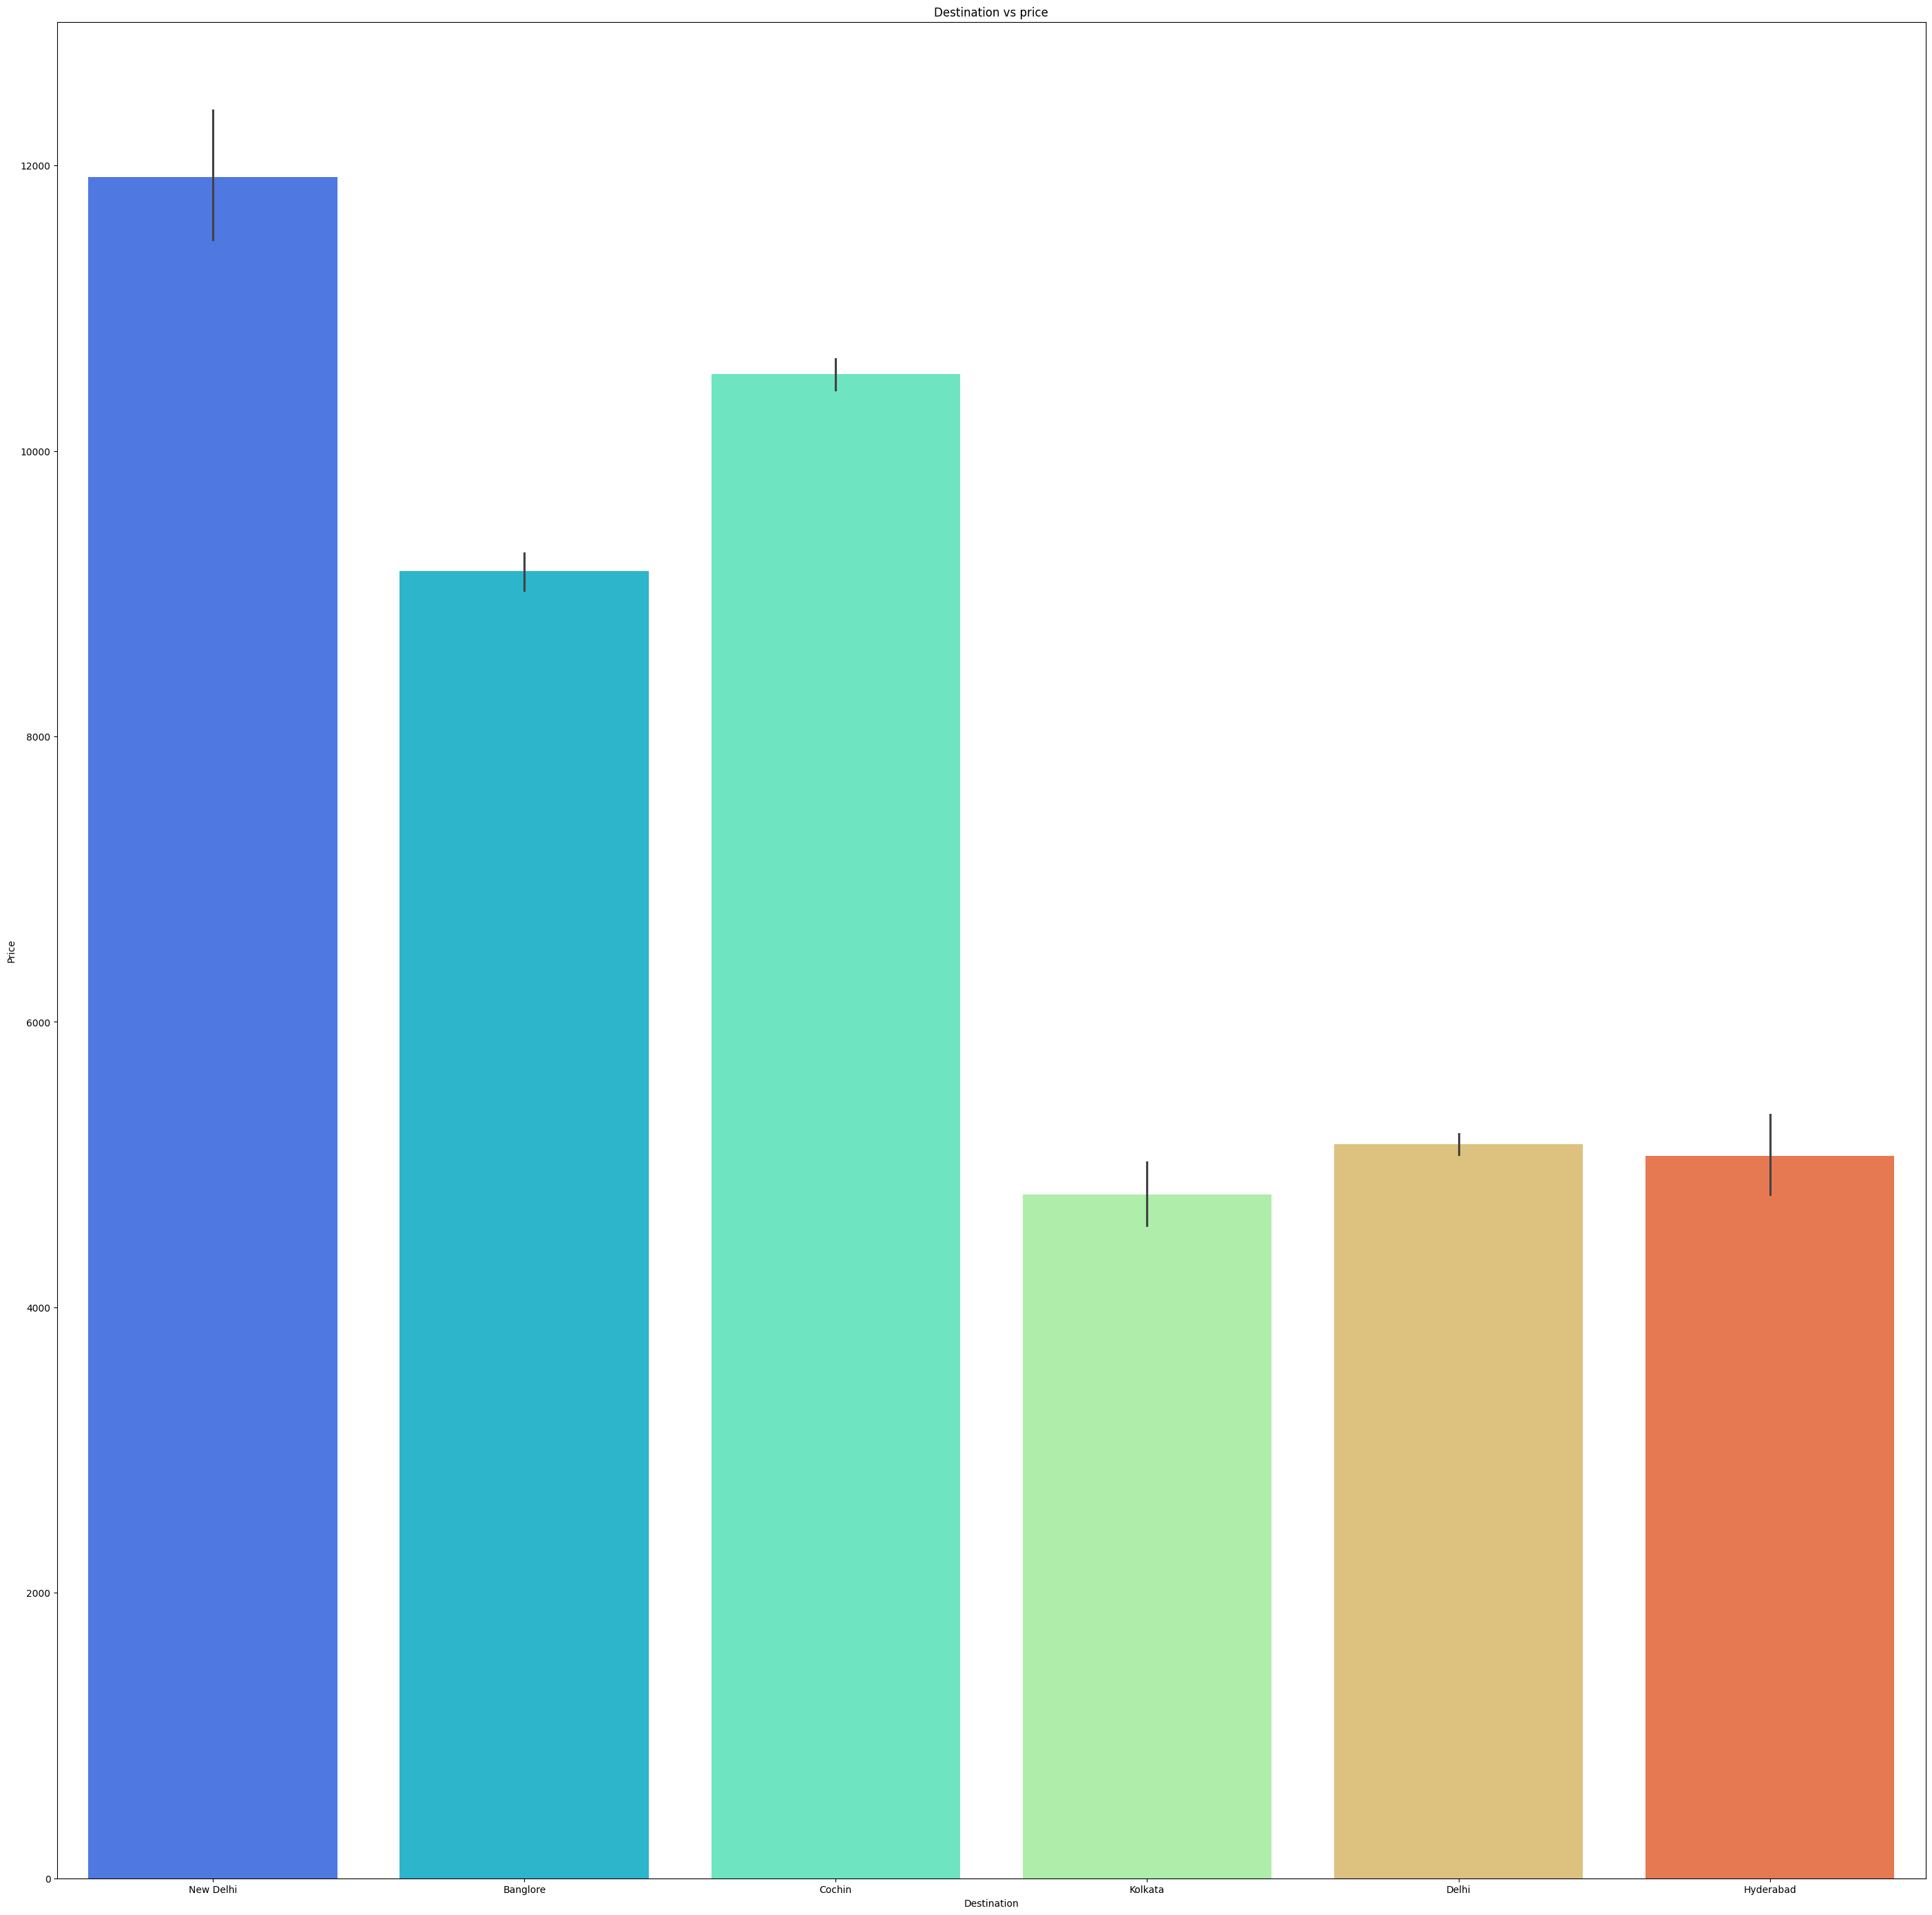

In [171]:
plt.figure(figsize=(35,35))
sns.barplot(x='Destination',y='Price',data=df1, palette='rainbow')
plt.title("Destination vs price")
plt.show()

- Delhi has the highest price`

### Handling Categorical Data
 Handling Categorical Data One can find many ways to handle categorical data. Some of them categorical data are

- Nominal data --> data are not in any order --> OneHotEncoder is used in this case
- Ordinal data --> data are in order --> LabelEncoder is used in this case

In [172]:
df1.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year', 'hours', 'minutes', 'Arrival_hour', 'Arrival_min',
       'duration-mins', 'duration-hours'],
      dtype='object')

In [173]:
df1.Airline
# itS a nominal categorical  data 

0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10682, dtype: object

In [174]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = df1[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)
Airline.replace({False: 0, True: 1}, inplace=True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [175]:
Airline.dtypes

Airline_Air India                            int64
Airline_GoAir                                int64
Airline_IndiGo                               int64
Airline_Jet Airways                          int64
Airline_Jet Airways Business                 int64
Airline_Multiple carriers                    int64
Airline_Multiple carriers Premium economy    int64
Airline_SpiceJet                             int64
Airline_Trujet                               int64
Airline_Vistara                              int64
Airline_Vistara Premium economy              int64
dtype: object

In [176]:
Source = df1[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)
Source.replace({False: 0, True: 1}, inplace=True)


Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [177]:
Destination = df1[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)
Destination.replace({False:0, True:1}, inplace=True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [178]:
df1.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year', 'hours', 'minutes', 'Arrival_hour', 'Arrival_min',
       'duration-mins', 'duration-hours'],
      dtype='object')

- route and total stops gives almost the same information and they are highky related so we can drop route coumn

In [179]:
df1.drop(["Additional_Info"], axis = 1, inplace = True)

In [180]:
df1

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_day,Journey_month,Journey_year,hours,minutes,Arrival_hour,Arrival_min,duration-mins,duration-hours
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,3897,24,3,2019,22,20,1,10,50,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662,1,5,2019,5,50,13,15,25,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,13882,9,6,2019,9,25,4,25,0,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,6218,12,5,2019,18,5,23,30,25,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,13302,1,3,2019,16,50,21,35,45,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,4107,9,4,2019,19,55,22,25,30,2
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,4145,27,4,2019,20,45,23,20,35,2
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,7229,27,4,2019,8,20,11,20,0,3
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,12648,1,3,2019,11,30,14,10,40,2


In [181]:
df1.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Journey_year', 'hours', 'minutes',
       'Arrival_hour', 'Arrival_min', 'duration-mins', 'duration-hours'],
      dtype='object')

In [182]:
df1.Total_Stops.unique

<bound method Series.unique of 0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object>

- as total steps is a ordinal categorical value we will use label encoder

In [183]:
df1.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [184]:
df2 = pd.concat([df1, Airline, Source, Destination], axis = 1)

In [185]:
df2.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [186]:
df2

,Route,Total_Stops,Price,Journey_day,Journey_month,Journey_year,hours,minutes,Arrival_hour,Arrival_min,duration-mins,duration-hours,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,0,3897,24,3,2019,22,20,1,10,50,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2,7662,1,5,2019,5,50,13,15,25,7,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2,13882,9,6,2019,9,25,4,25,0,19,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,1,6218,12,5,2019,18,5,23,30,25,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,1,13302,1,3,2019,16,50,21,35,45,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,0,4107,9,4,2019,19,55,22,25,30,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,CCU → BLR,0,4145,27,4,2019,20,45,23,20,35,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,BLR → DEL,0,7229,27,4,2019,8,20,11,20,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,BLR → DEL,0,12648,1,3,2019,11,30,14,10,40,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [187]:
df2 = df2.drop(["Route"],axis =1)

In [188]:
df2

,Total_Stops,Price,Journey_day,Journey_month,Journey_year,hours,minutes,Arrival_hour,Arrival_min,duration-mins,duration-hours,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,22,20,1,10,50,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,5,50,13,15,25,7,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,2019,9,25,4,25,0,19,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,2019,18,5,23,30,25,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,2019,16,50,21,35,45,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,2019,19,55,22,25,30,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,2019,20,45,23,20,35,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,2019,8,20,11,20,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,2019,11,30,14,10,40,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


-  as u can see after doing the encoding our total number of columns incresed deom 14 to 31

### TEST DATA

In [189]:
df3 = pd.read_excel(r"D:\flight price prediction project\flight-price-prediction-project\notebook\data\Test_set.xlsx")

In [190]:
df3

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [191]:
df3.Airline.unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)

In [192]:
df3.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [193]:
df3 = df3.dropna()

In [194]:
df3. Airline

0             Jet Airways
1                  IndiGo
2             Jet Airways
3       Multiple carriers
4                Air Asia
              ...        
2666            Air India
2667               IndiGo
2668          Jet Airways
2669            Air India
2670    Multiple carriers
Name: Airline, Length: 2671, dtype: object

In [195]:
df3['Date_of_Journey']

0        6/06/2019
1       12/05/2019
2       21/05/2019
3       21/05/2019
4       24/06/2019
           ...    
2666     6/06/2019
2667    27/03/2019
2668     6/03/2019
2669     6/03/2019
2670    15/06/2019
Name: Date_of_Journey, Length: 2671, dtype: object

In [196]:
df3['Journey_day']=pd.to_datetime(df3['Date_of_Journey'],format="%d/%m/%Y").dt.day

In [197]:
df3['Journey_month']=pd.to_datetime(df3['Date_of_Journey'],format="%d/%m/%Y").dt.month
df3['Journey_year']=pd.to_datetime(df3['Date_of_Journey'],format="%d/%m/%Y").dt.year
df3= df3.drop(['Date_of_Journey'], axis=1)
df3['hours']=pd.to_datetime(df3['Dep_Time']).dt.hour
df3['minutes']=pd.to_datetime(df3['Dep_Time']).dt.minute
df3.drop(["Dep_Time"], axis = 1, inplace = True)
df3["Arrival-hour"] = pd.to_datetime(df3.Arrival_Time).dt.hour
df3["Arrival-min"] = pd.to_datetime(df3.Arrival_Time).dt.minute
duration = list(df3.Duration)

C:\Users\acer\AppData\Local\Temp\ipykernel_24292\991200147.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df3['hours']=pd.to_datetime(df3['Dep_Time']).dt.hour
C:\Users\acer\AppData\Local\Temp\ipykernel_24292\991200147.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df3['minutes']=pd.to_datetime(df3['Dep_Time']).dt.minute
C:\Users\acer\AppData\Local\Temp\ipykernel_24292\991200147.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df3["Arrival-hour"] = pd.to_datetime(df3.Arrival_Time).dt.hour
C:\Users\acer\AppData\Local\Temp\ipykernel_24292\991200147.py:8: UserWarni

In [198]:
df3

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Journey_year,hours,minutes,Arrival-hour,Arrival-min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,2019,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,2019,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,2019,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2019,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:25 07 Jun,23h 55m,1 stop,No info,6,6,2019,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,16:55,2h 35m,non-stop,No info,27,3,2019,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Mar,6h 35m,1 stop,No info,6,3,2019,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,19:15,15h 15m,1 stop,No info,6,3,2019,4,0,19,15


In [199]:
duration = list(df3["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [200]:
df3["duration-mins"]= duration_mins
df3["duration-hours"]= duration_hours
df3 = df3.drop(["Duration"],axis=1)
df3 = df3.drop(["Arrival_Time"],axis=1)

In [201]:
Airline = df3[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.replace({False:0, True:1}, inplace=True)

Airline

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2666,1,0,0,0,0,0,0,0,0,0
2667,0,0,1,0,0,0,0,0,0,0
2668,0,0,0,1,0,0,0,0,0,0
2669,1,0,0,0,0,0,0,0,0,0


In [202]:
Source = df3[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)
Source.replace({False:0, True:1}, inplace=True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [203]:
Destination = df3[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)
Destination.replace({False:0, True:1}, inplace=True)

Destination.head()


df3.drop(["Additional_Info"], axis = 1, inplace = True)


df3.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

df4 = pd.concat([df3, Airline, Source, Destination], axis = 1)

df4.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [204]:
df4.drop(["Route"],axis =1)

,Total_Stops,Journey_day,Journey_month,Journey_year,hours,minutes,Arrival-hour,Arrival-min,duration-mins,duration-hours,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,2019,17,30,4,25,55,10,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,2019,6,20,10,20,0,4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,2019,19,15,19,0,45,23,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,2019,8,0,21,0,0,13,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,2019,23,55,2,45,50,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,2019,20,30,20,25,55,23,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2667,0,27,3,2019,14,20,16,55,35,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2668,1,6,3,2019,21,50,4,25,35,6,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2669,1,6,3,2019,4,0,19,15,15,15,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [205]:
df3.Airline.unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)

In [206]:
df4.columns

Index(['Route', 'Total_Stops', 'Journey_day', 'Journey_month', 'Journey_year',
       'hours', 'minutes', 'Arrival-hour', 'Arrival-min', 'duration-mins',
       'duration-hours', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [207]:
df2.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Journey_year',
       'hours', 'minutes', 'Arrival_hour', 'Arrival_min', 'duration-mins',
       'duration-hours', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

### Corelation
- we will use heat map to find the best co relation to do feature scaling

In [208]:
X = df2.drop(["Price"],axis =1)

In [209]:
y = df2['Price']

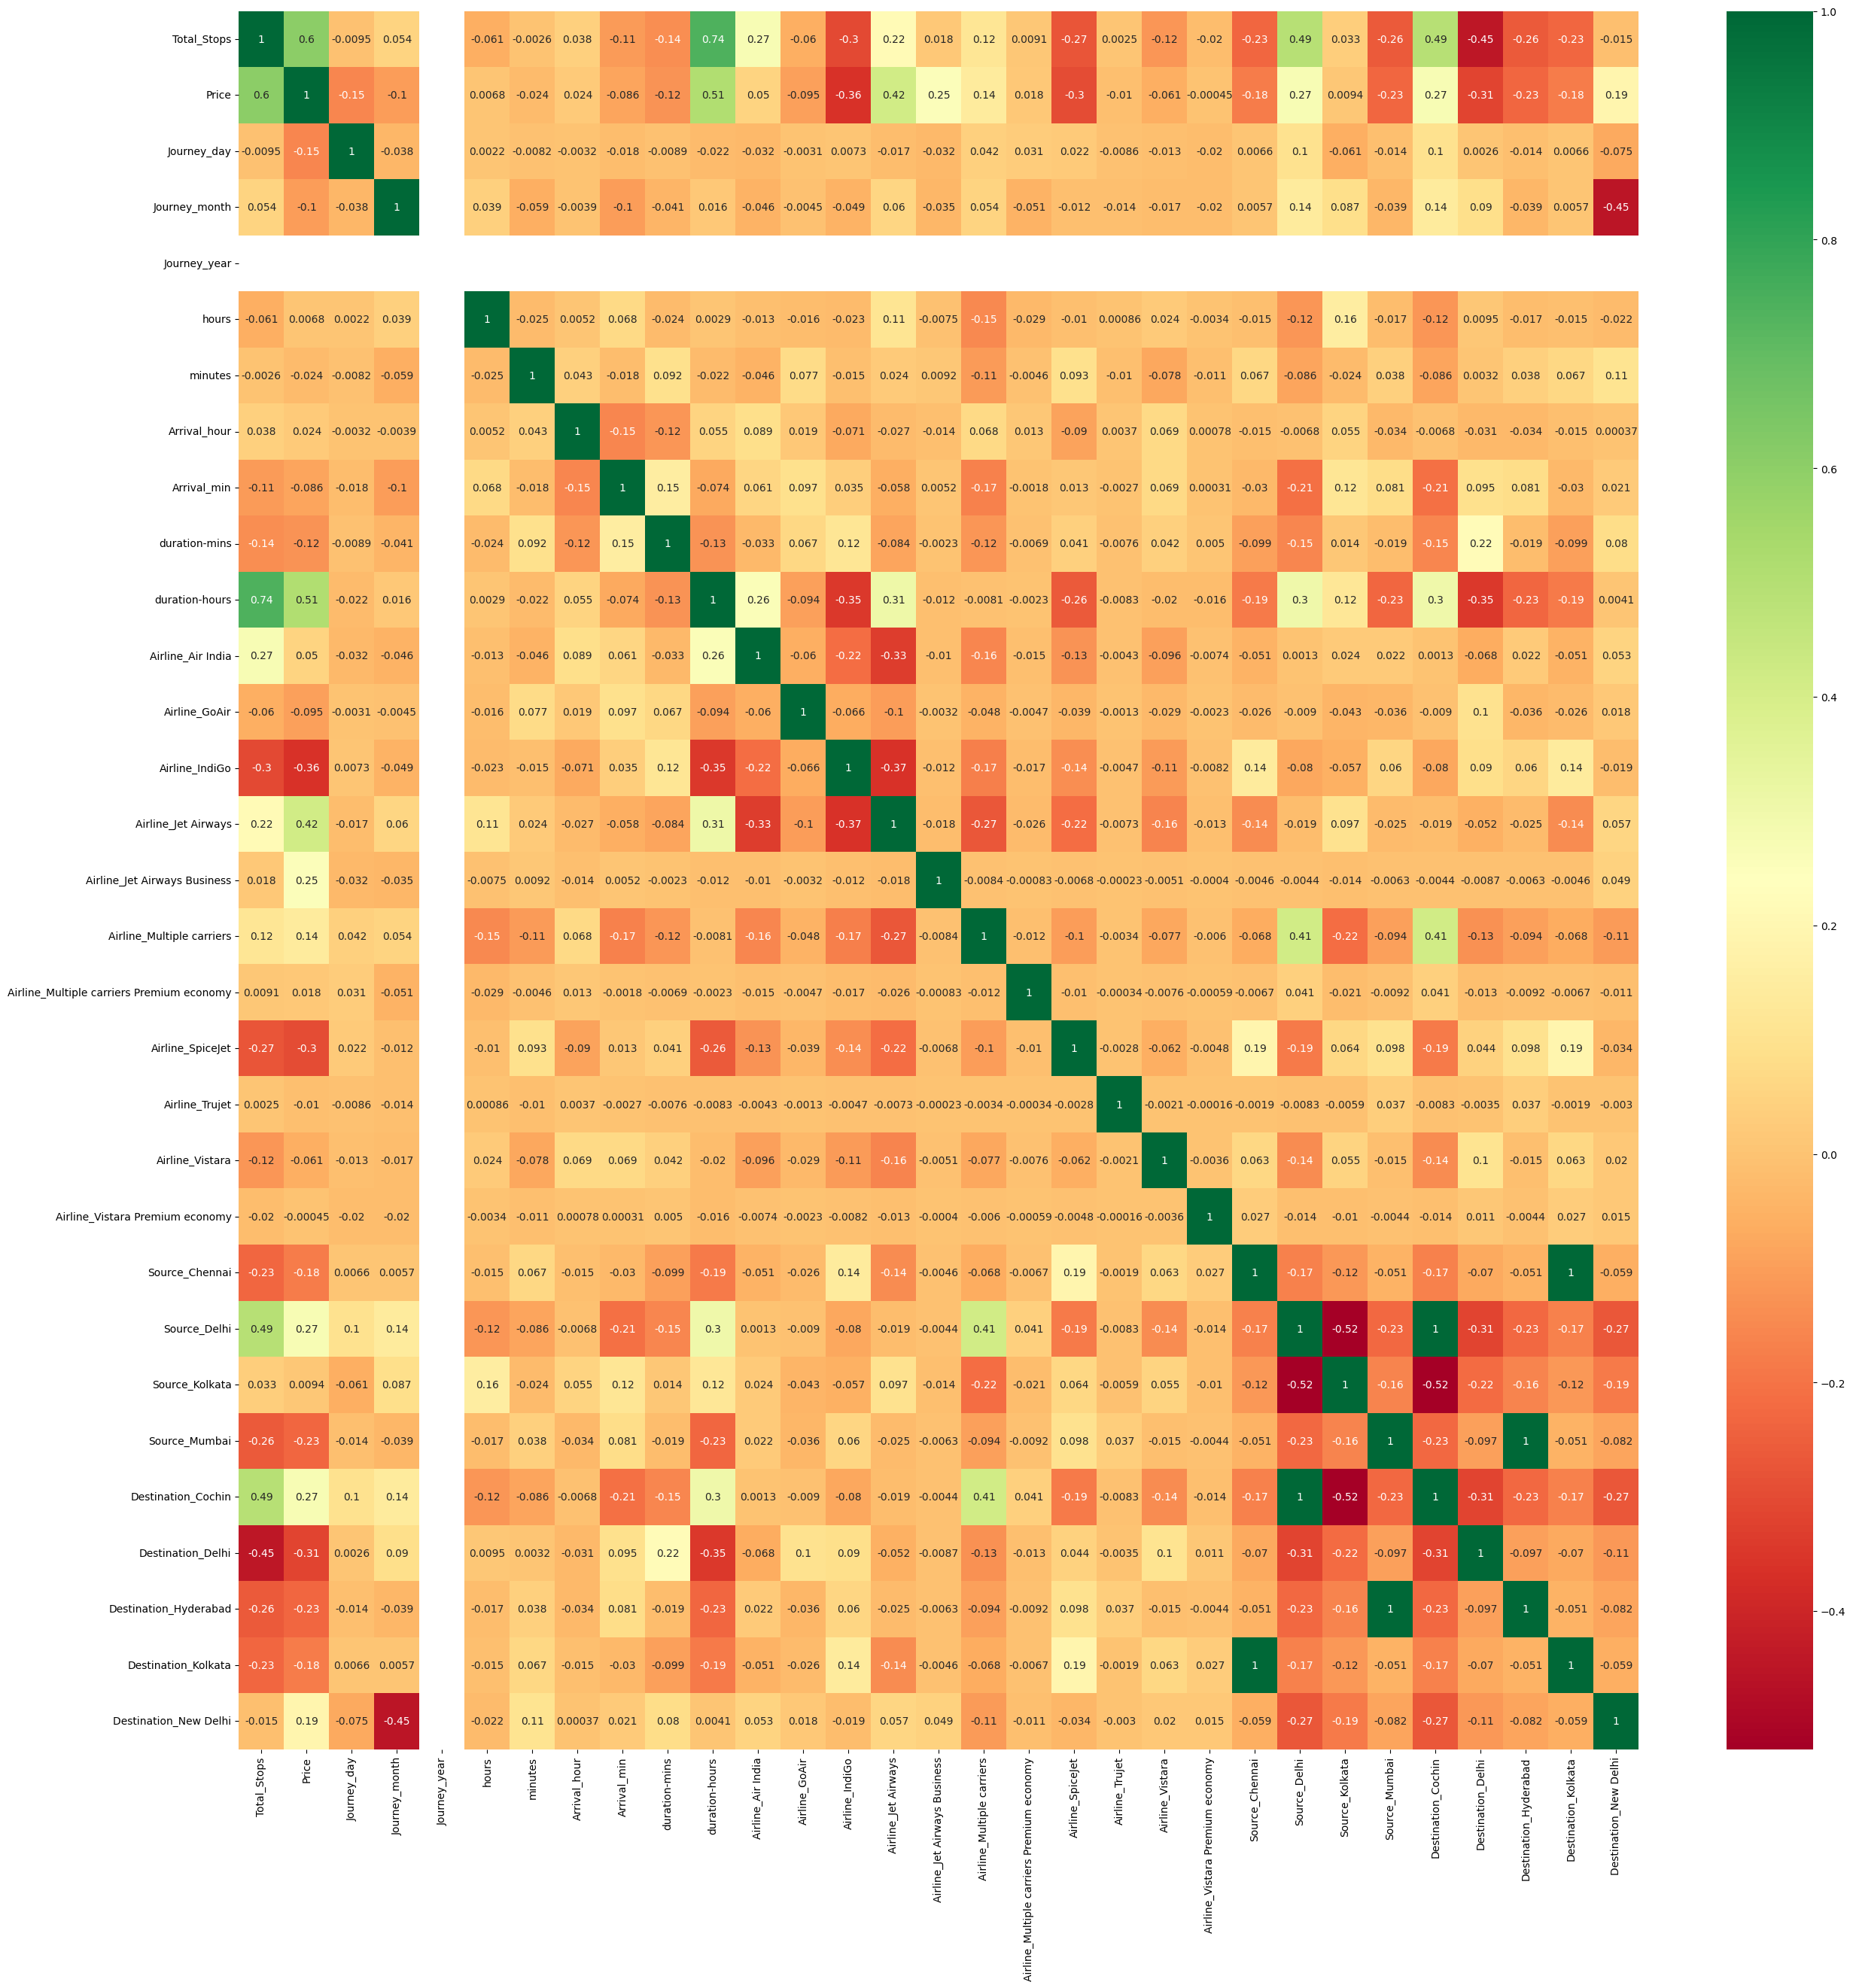

In [210]:
plt.figure(figsize = (30,30))
sns.heatmap(df2.corr(), annot = True, cmap = "RdYlGn")

plt.show()

### Feature Selection

In [211]:
from sklearn.ensemble import RandomForestRegressor

In [212]:
from sklearn.model_selection import train_test_split

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [214]:
X_train.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Journey_year', 'hours',
       'minutes', 'Arrival_hour', 'Arrival_min', 'duration-mins',
       'duration-hours', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [215]:
from sklearn.feature_selection import SelectFromModel

In [216]:
selection = SelectFromModel(RandomForestRegressor())
sel = selection.fit(X_train, y_train)

In [217]:
selection.get_support()

array([ True,  True,  True, False, False, False,  True, False, False,
        True, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [218]:
selected_feat= X_train.columns[(sel.get_support())]

In [219]:
selected_feat

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Arrival_hour',
       'duration-hours', 'Airline_Jet Airways',
       'Airline_Jet Airways Business'],
      dtype='object')

In [220]:
len(selected_feat)

7

In [221]:
print(selected_feat)

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Arrival_hour',
       'duration-hours', 'Airline_Jet Airways',
       'Airline_Jet Airways Business'],
      dtype='object')


### Fitting the model using Random Forest

In [222]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [223]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [224]:
y_pred = rf.predict(X_test)

In [225]:
y_pred

array([16817.18      ,  5629.32      ,  8915.71      , ...,
        6573.02      , 12758.2125    , 13207.91533333])

In [226]:
rf.score(X_train, y_train)

0.9528410577989175

In [227]:
rf.score(X_test, y_test)

0.7970519437175638

C:\Users\acer\AppData\Local\Temp\ipykernel_24292\3453123835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


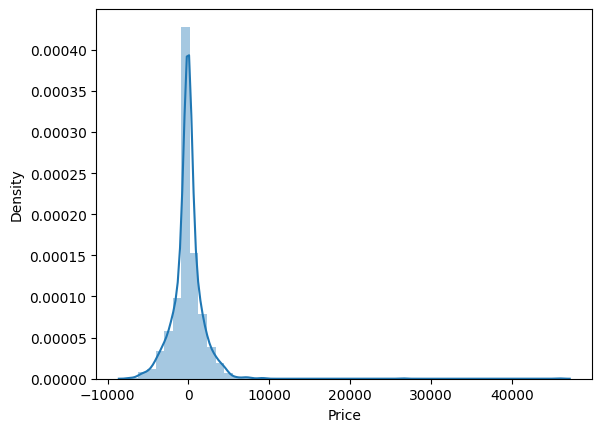

In [228]:
sns.distplot(y_test-y_pred)
plt.show()

In [229]:
from sklearn import metrics

In [230]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1176.1102036232369
MSE: 4375977.420441046
RMSE: 2091.8837014616865


In [231]:
metrics.r2_score(y_test, y_pred)

0.7970519437175638

### Hyperparameter Tuning
##### Choose following method for hyperparameter tuning

     RandomizedSearchCV
     
     GridSearchCV
     
- Assign hyperparameters in form of dictionery
- Fit the model
- Check best paramters and best score

In [232]:
from sklearn.model_selection import RandomizedSearchCV

In [233]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [234]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [235]:
random_search=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=5,n_jobs=-1,verbose=3,scoring='neg_mean_squared_error', n_iter = 10,)

In [236]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\acer\anaconda3\envs\flight\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\acer\anaconda3\envs\flight\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\acer\anaconda3\envs\flight\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\acer\anaconda3\envs\flight\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=3)

In [237]:
random_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20}

In [238]:
prediction =random_search.predict(X_test)

In [239]:
prediction 

array([16177.76405269,  6117.18015718,  8629.93370763, ...,
        6722.08879254, 12061.3870634 , 12354.17748072])

C:\Users\acer\AppData\Local\Temp\ipykernel_24292\375150797.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


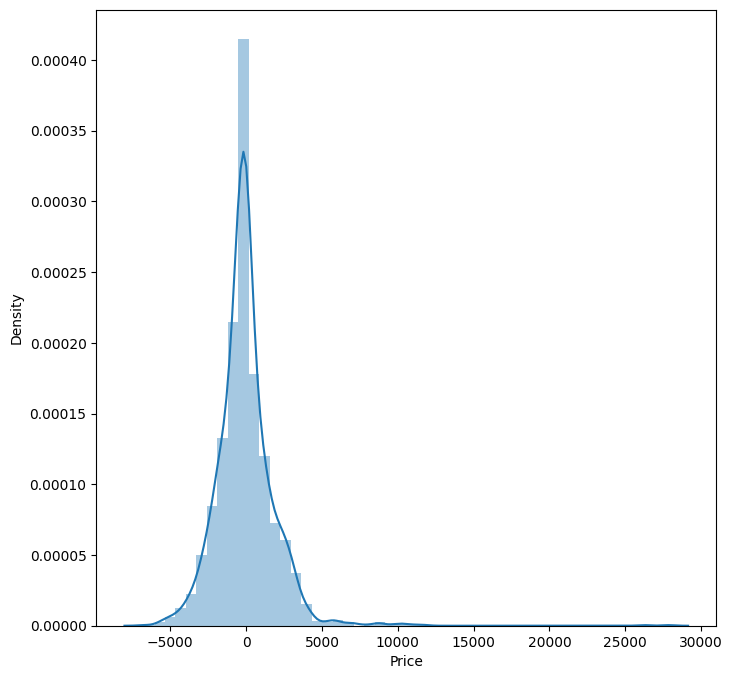

In [240]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

In [241]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1283.3307785029656
MSE: 3966076.391626026
RMSE: 1991.5010398254944


In [242]:
rf.score(X_test, y_test)

0.7970519437175638

In [243]:
filename = "flight_pred"

In [244]:
import pickle
import os

In [245]:
with open('flight_pred','wb') as f:
    pickle.dump(rf,f)